# NYC TRIP DURATION PREDICTION

# Importing Relevant Modules

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm

In [16]:
df=pd.read_csv('/Users/mayankajha/Documents/Spring-2018/INST_737/Final_Project/train.csv')

In [17]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [18]:
#Checking null values in the dataset
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [19]:
# remove obvious outliers
allLat  = np.array(list(df['pickup_latitude'])  + list(df['dropoff_latitude']))
allLong = np.array(list(df['pickup_longitude']) + list(df['dropoff_longitude']))

longLimits = [np.percentile(allLong, 0.3), np.percentile(allLong, 99.7)]
latLimits  = [np.percentile(allLat , 0.3), np.percentile(allLat , 99.7)]
durLimits  = [np.percentile(df['trip_duration'], 0.4), np.percentile(df['trip_duration'], 99.7)]

df = df[(df['pickup_latitude']   >= latLimits[0] ) & (df['pickup_latitude']   <= latLimits[1]) ]
df = df[(df['dropoff_latitude']  >= latLimits[0] ) & (df['dropoff_latitude']  <= latLimits[1]) ]
df = df[(df['pickup_longitude']  >= longLimits[0]) & (df['pickup_longitude']  <= longLimits[1])]
df = df[(df['dropoff_longitude'] >= longLimits[0]) & (df['dropoff_longitude'] <= longLimits[1])]
df = df[(df['trip_duration']     >= durLimits[0] ) & (df['trip_duration']     <= durLimits[1]) ]
df = df.reset_index(drop=True)

allLat  = np.array(list(df['pickup_latitude'])  + list(df['dropoff_latitude']))
allLong = np.array(list(df['pickup_longitude']) + list(df['dropoff_longitude']))

In [20]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Text(0.5,0,'longitude')

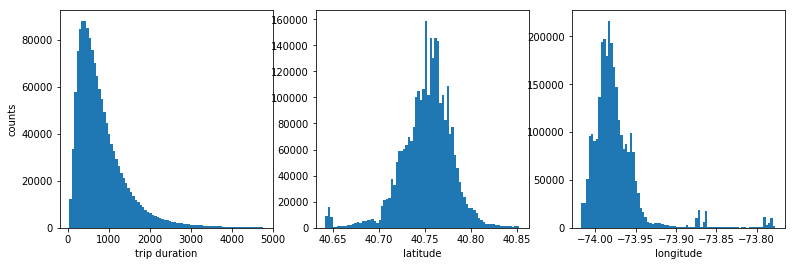

In [21]:
fig, axArray = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
axArray[0].hist(df['trip_duration'],80); 
axArray[0].set_xlabel('trip duration'); axArray[0].set_ylabel('counts')
axArray[1].hist(allLat ,80); axArray[1].set_xlabel('latitude')
axArray[2].hist(allLong,80); axArray[2].set_xlabel('longitude')

Since latitude, longitude and trip duration are not readable in their current units we are converting the coordinates to km and time duration to min and creating new columns with the converted values

In [22]:
# convert fields to sensible units
medianLat  = np.percentile(allLat,50)
medianLong = np.percentile(allLong,50)

#The approximate conversions are:
#Latitude: 1 deg = 110.574 km
#Longitude: 1 deg = 111.320*cos(latitude) km
latMultiplier  = 111.32
longMultiplier = np.cos(medianLat*(np.pi/180.0)) * 111.32

df['duration_min'] = df['trip_duration']/60.0
df['source_lat_km']   = latMultiplier  * (df['pickup_latitude']   - medianLat)
df['source_long_km']  = longMultiplier * (df['pickup_longitude']  - medianLong)
df['dst_lat_km']   = latMultiplier  * (df['dropoff_latitude']  - medianLat)
df['dst_long_km']  = longMultiplier * (df['dropoff_longitude'] - medianLong)

allLat  = np.array(list(df['source_lat_km'])  + list(df['dst_lat_km']))
allLong = np.array(list(df['source_long_km']) + list(df['dst_long_km']))

In [23]:
#new columns added
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_min,source_lat_km,source_long_km,dst_lat_km,dst_long_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.583333,1.486707,-0.099721,1.226820,1.378075
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11.050000,-1.783114,0.046965,-2.608213,-1.560788
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35.400000,1.041672,0.164056,-4.953142,-2.054245
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.150000,-3.852868,-2.451197,-5.328110,-2.639058
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.250000,4.300027,0.667806,3.110152,0.678744


Text(0.5,0,'longitude [km]')

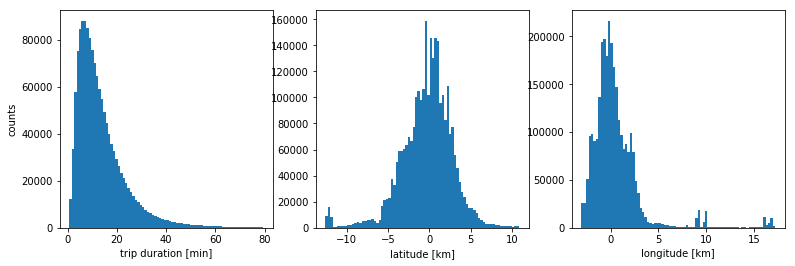

In [24]:
fig, axArray = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
axArray[0].hist(df['duration_min'],80); 
axArray[0].set_xlabel('trip duration [min]'); axArray[0].set_ylabel('counts')
axArray[1].hist(allLat ,80); axArray[1].set_xlabel('latitude [km]')
axArray[2].hist(allLong,80); axArray[2].set_xlabel('longitude [km]')

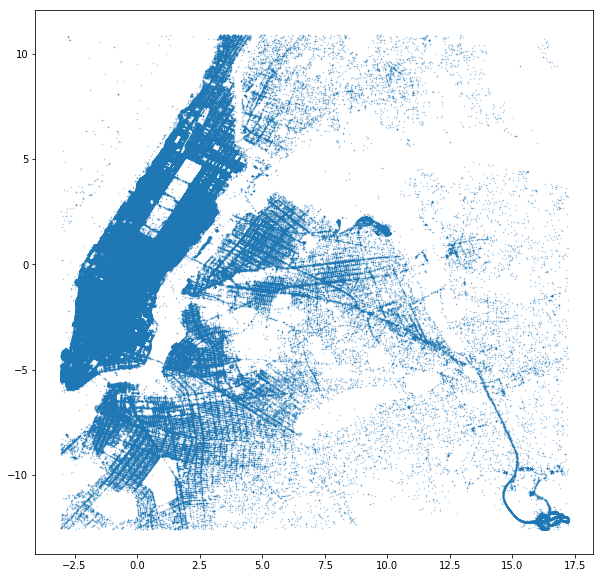

In [25]:
plt.figure(figsize = (10,10))
plt.plot(allLong,allLat,'.', alpha = 0.4, markersize = 1)
plt.show()

In [26]:
loc_df = pd.DataFrame()
loc_df['longitude'] = allLong
loc_df['latitude'] = allLat

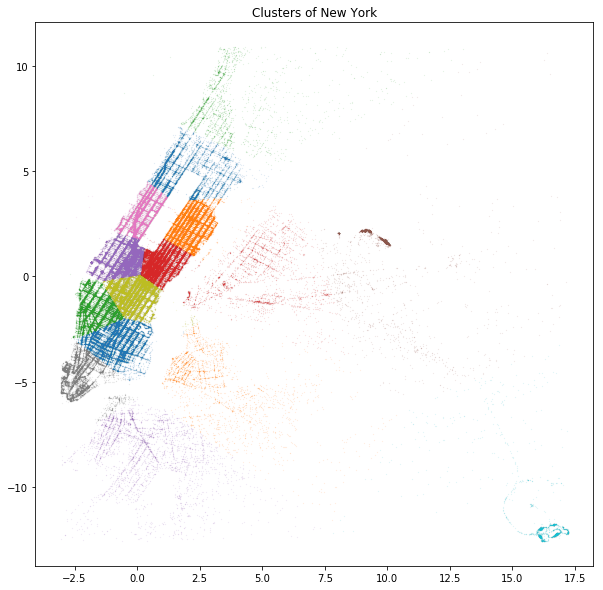

In [27]:
# Clustering New York City based on the pick-up and drop-off points of each taxi ride

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

loc_df = loc_df.sample(200000)
plt.figure(figsize = (10,10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York')
plt.show()

In [28]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime=pd.to_datetime(df.dropoff_datetime)
df['pu_hour'] = df.pickup_datetime.dt.hour
df['yday'] = df.pickup_datetime.dt.dayofyear
df['wday'] = df.pickup_datetime.dt.dayofweek

In [29]:
weather_data = pd.read_csv('weather_data_nyc_centralpark_2016.csv')
weather_data.head()

,date,maximum temerature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,01-01-16,44,34,39.0,0,0,0
1,02-01-16,40,30,35.0,0,0,0
2,03-01-16,46,33,39.5,0,0,0
3,04-01-16,35,13,24.0,0,0,0
4,05-01-16,29,10,19.5,0,0,0


In [30]:
weather_data['date']=pd.to_datetime(weather_data.date,format="%d-%m-%y")
weather_data['yday'] = weather_data.date.dt.dayofyear

In [31]:
weather_data.head()

,date,maximum temerature,minimum temperature,average temperature,precipitation,snow fall,snow depth,yday
0,2016-01-01,44,34,39.0,0,0,0,1
1,2016-01-02,40,30,35.0,0,0,0,2
2,2016-01-03,46,33,39.5,0,0,0,3
3,2016-01-04,35,13,24.0,0,0,0,4
4,2016-01-05,29,10,19.5,0,0,0,5


In [32]:
falls = [ 0.01 if c=='T' else float(c) for c in weather_data['snow fall']]
rain = [ 0.01 if c=='T' else float(c) for c in weather_data['precipitation']]
weather_data['snow fall']= falls
weather_data['precipitation'] = rain

In [33]:
weather_data.head()

,date,maximum temerature,minimum temperature,average temperature,precipitation,snow fall,snow depth,yday
0,2016-01-01,44,34,39.0,0.0,0.0,0,1
1,2016-01-02,40,30,35.0,0.0,0.0,0,2
2,2016-01-03,46,33,39.5,0.0,0.0,0,3
3,2016-01-04,35,13,24.0,0.0,0.0,0,4
4,2016-01-05,29,10,19.5,0.0,0.0,0,5


In [34]:
df_merged = pd.merge(df,weather_data,on='yday')
df_merged.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pu_hour,yday,wday,date,maximum temerature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,74,0,2016-03-14,48,42,45.0,0.89,0.0,0
1,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,...,14,74,0,2016-03-14,48,42,45.0,0.89,0.0,0
2,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,...,15,74,0,2016-03-14,48,42,45.0,0.89,0.0,0
3,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,...,4,74,0,2016-03-14,48,42,45.0,0.89,0.0,0
4,id3817493,2,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,N,...,14,74,0,2016-03-14,48,42,45.0,0.89,0.0,0


In [35]:
df_dropped = df_merged.drop(['date','maximum temerature','minimum temperature'],axis=1)
df_dropped.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,source_long_km,dst_lat_km,dst_long_km,pu_hour,yday,wday,average temperature,precipitation,snow fall,snow depth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,-0.099721,1.226820,1.378075,17,74,0,45.0,0.89,0.0,0
1,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,...,0.496030,1.167369,2.341826,14,74,0,45.0,0.89,0.0,0
2,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,...,-1.139388,-3.547968,-1.519613,15,74,0,45.0,0.89,0.0,0
3,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,...,3.087479,-5.019388,5.940132,4,74,0,45.0,0.89,0.0,0
4,id3817493,2,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,N,...,2.368847,0.817031,0.197511,14,74,0,45.0,0.89,0.0,0


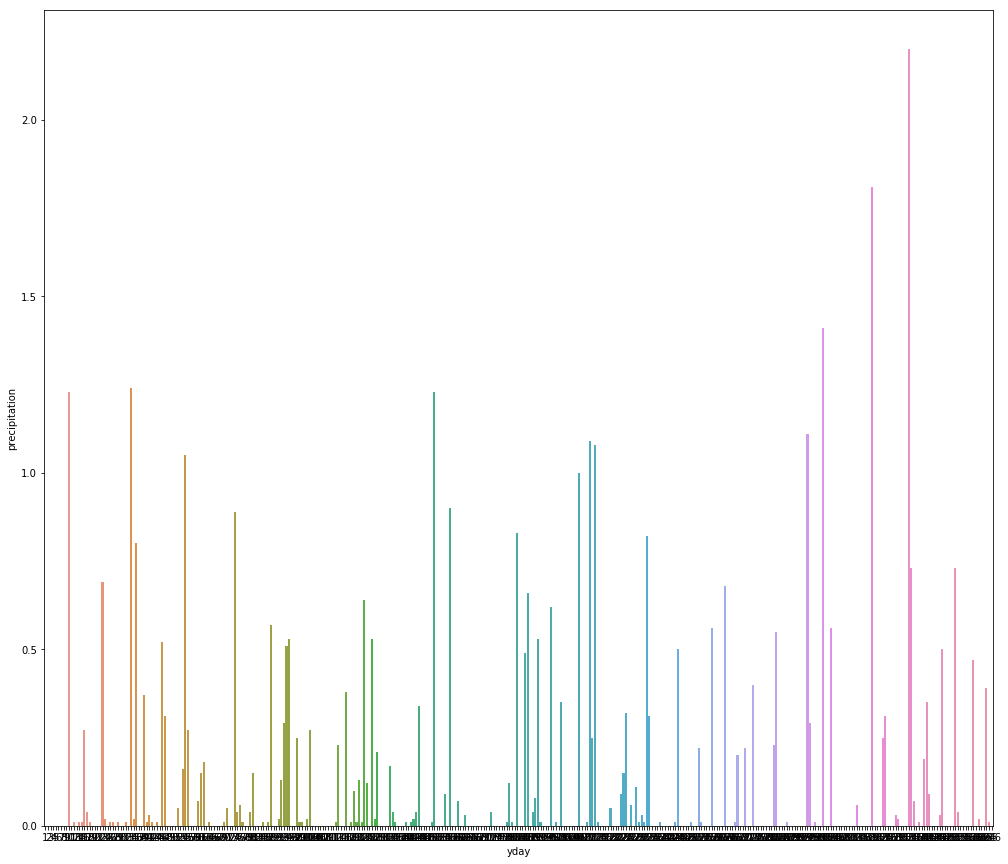

In [36]:
import seaborn as sns
plt.subplots(1,1,figsize=(17,15))
rain = weather_data['precipitation']
sns.barplot(weather_data['yday'], rain)

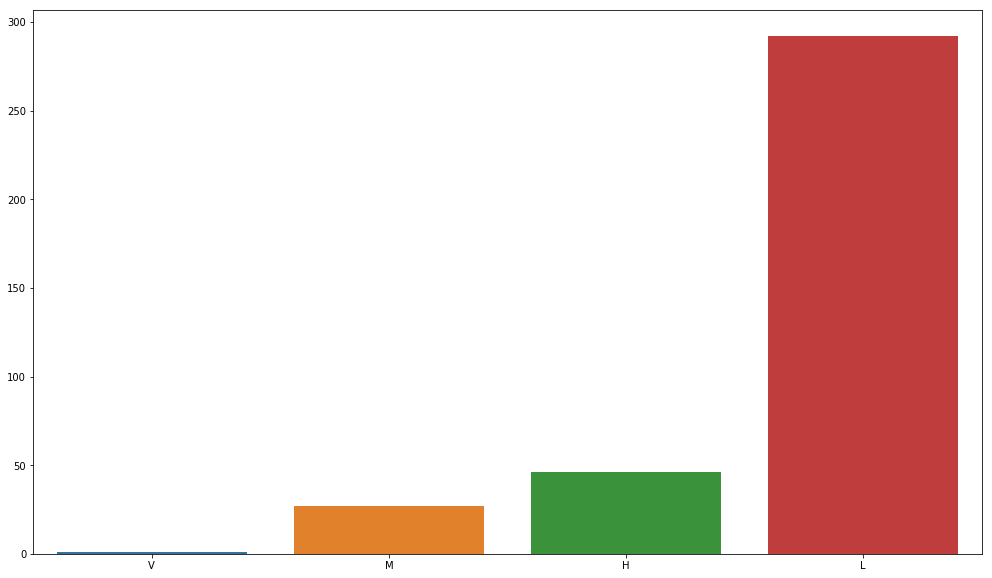

In [37]:
intensity = weather_data['precipitation'].apply(lambda x:'L' if x < 0.098 
                           else 'M' if x>=0.098 and x<0.30 
                           else 'H' if x>=0.30 and x<2.0
                           else 'V')
weather_data['precipitation'] = intensity
rain_count =  weather_data['precipitation'].value_counts().sort_values()
plt.subplots(1,1,figsize=(17,10))
sns.barplot(rain_count.index,rain_count.values)

In [38]:
rain_dummies = pd.get_dummies(weather_data['precipitation'])
df_rain_dummies = pd.concat([df_dropped, rain_dummies], axis=1)
df_rain_dummies = df_rain_dummies.drop(['precipitation'],axis=1)

In [39]:
df_rain_dummies.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pu_hour,yday,wday,average temperature,snow fall,snow depth,H,L,M,V
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,74,0,45.0,0.0,0,0.0,1.0,0.0,0.0
1,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,...,14,74,0,45.0,0.0,0,0.0,1.0,0.0,0.0
2,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,...,15,74,0,45.0,0.0,0,0.0,1.0,0.0,0.0
3,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,...,4,74,0,45.0,0.0,0,0.0,1.0,0.0,0.0
4,id3817493,2,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,N,...,14,74,0,45.0,0.0,0,0.0,1.0,0.0,0.0


In [40]:
df_rain_dummies.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'duration_min', 'source_lat_km', 'source_long_km',
       'dst_lat_km', 'dst_long_km', 'pu_hour', 'yday', 'wday',
       'average temperature', 'snow fall', 'snow depth', 'H', 'L', 'M', 'V'],
      dtype='object')

In [41]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [42]:
df_rain_dummies['distance'] = haversine_np(df_rain_dummies.pickup_longitude, df_rain_dummies.pickup_latitude,
                                           df_rain_dummies.dropoff_longitude, df_rain_dummies.dropoff_latitude)

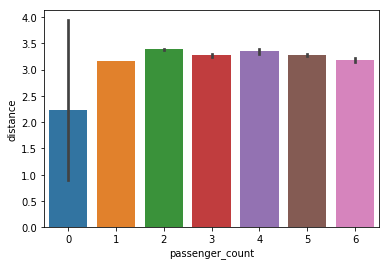

In [43]:
import seaborn as sns
#sns.set(style="ticks")
sel = df_rain_dummies[['distance','passenger_count']]
sns.barplot(x='passenger_count',y='distance',data=sel)
#sns.despine(offset=10, trim=True)

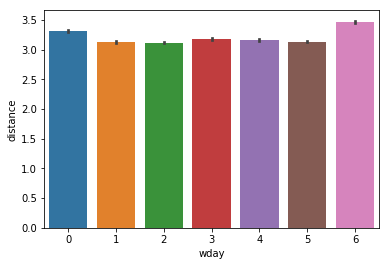

In [44]:
import seaborn as sns
#sns.set(style="ticks")
sel = df_rain_dummies[['distance','wday']]
sns.barplot(x='wday',y='distance',data=sel)
#sns.despine(offset=10, trim=True)

# Now, we will try linear regression with different sets of features

In [45]:
features = df_rain_dummies[['wday','yday','pu_hour','passenger_count','pickup_latitude','pickup_longitude','vendor_id']]
target = df_rain_dummies[['trip_duration']]

In [46]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [48]:
score = cross_val_score(lr, features, target, cv = 10, scoring = 'neg_mean_squared_log_error')
np.mean(np.sqrt(score * -1))

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.7312422741184342

In [49]:
from sklearn import linear_model
lr = linear_model.Ridge(alpha = .5)
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
score = cross_val_score(lr, features, target, cv=cv, scoring = 'neg_mean_squared_log_error')
np.mean(np.sqrt(score * -1))

0.7309559793628375

In [57]:
lr.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')
score = cross_val_score(GBR, features, target, cv = 10, scoring = 'neg_mean_squared_log_error')
np.mean(np.sqrt(score * -1))


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.7320344432327289